# Inplementación K-Means
## Sergio Peñuela 201922873

En este notebook se hará la implementación del método k-means.

### Imports

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

### Carga de datos

In [47]:
df = pd.read_csv("data/processed_data.csv")
df.sample(5)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
710,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.036036,-4.099867e+07
43,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0.099738,4.806789e+07
970,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,-0.224548,1.415324e+07
922,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.093969,1.889894e+08
540,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.207532,1.500000e+10


In [48]:
df.describe()

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,9.730000e+02
mean,1.230216,0.039054,0.030832,0.016444,0.909558,0.004111,0.163412,0.554985,0.096608,0.127441,0.057554,0.023638,0.305242,0.065776,0.338129,0.054471,0.212744,0.120506,3.685651e+08
std,0.421187,0.193824,0.172953,0.127241,0.286961,0.064018,0.369931,0.497223,0.295576,0.333638,0.233018,0.151997,0.460746,0.248018,0.473316,0.227061,0.409459,0.239063,2.449989e+09
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.923522,-1.500000e+10
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005449,8.296140e+06
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086518,5.983828e+07
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.197501,2.257974e+08
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.917052,1.500000e+10


Como se puede ver las últimas 4 columnas tienen valores con magnitudes muy diferentes por lo que se procederá a estandarizar esas columnas utilizando StandardScaler

In [49]:
df = (df-df.min())/(df.max()-df.min())
df.head(5)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.335082,0.497562
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.389323,0.500765
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.380989,0.499643
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.328717,0.000000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.322632,0.500618


### Construcción del modelo

Primero se utilizará el método del codo para poder obtener el número óptimo de clusters a utilizar en el algoritmo

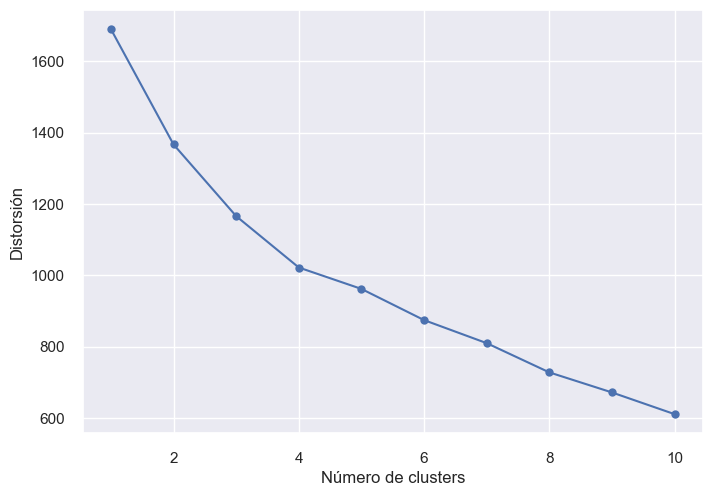

In [50]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

Como se puede ver en la gráfica a partir de 4 clústeres la reducción de la distorsión empieza a ser cada vez menor, por lo que de acuerdo con este método se deberían utilizar 2 clústers para este modelo.

In [51]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df.iloc[:,:])
y_kmeans = kmeans.predict(df)
df['kmean'] = kmeans.labels_
df['kmean'].value_counts()

1    329
0    297
2    207
3    140
Name: kmean, dtype: int64

Como se puede ver la gran mayoría de los datos se están agrupando en el clúster 0, esto probablemente se deba a que la diferencia de magnitudes en las últimas 4 columnas de los datos es bastante por lo que se procederá a estandarizar los datos.

In [52]:
df.head(15)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO,kmean
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.335082,0.497562,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.389323,0.500765,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.380989,0.499643,3
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.328717,0.000000,2
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.322632,0.500618,1
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.422384,0.504685,0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.326409,0.498513,1
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.459439,0.501324,0
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.341009,0.500722,1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.422469,0.508763,1


In [53]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(df.iloc[:,:])
y_kmeans = kmeans.predict(df)
df['kmean'] = kmeans.labels_
df['kmean'].value_counts()

0    329
2    297
1    207
3    140
Name: kmean, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='VARIACION ACTIVOS', ylabel='GANANCIA (PERDIDA) PROMEDIO'>

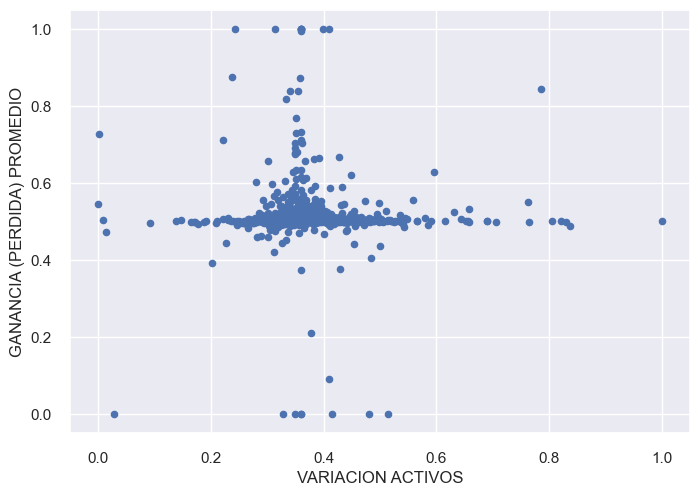

In [54]:
df.plot(kind='scatter', x='VARIACION ACTIVOS', y = 'GANANCIA (PERDIDA) PROMEDIO')

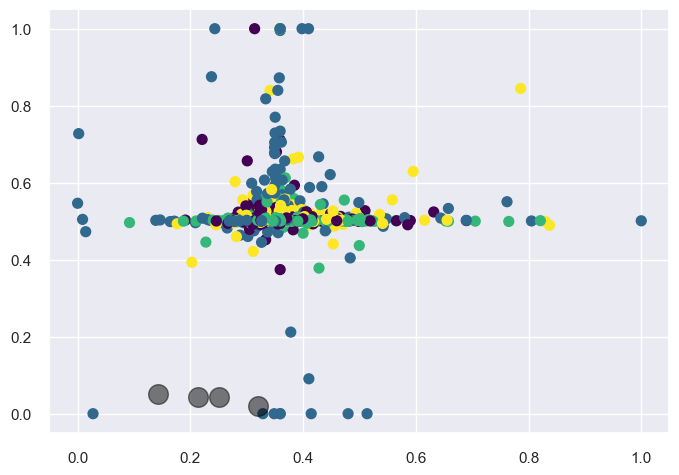

In [56]:
plt.scatter(df.iloc[:, 17].values, df.iloc[:, 18].values, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

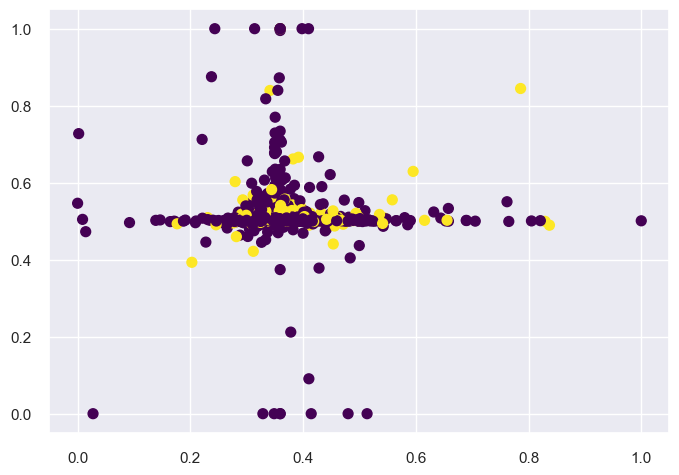

In [58]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(df, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(df.shape[0])[:n_clusters]
    df.to_numpy()
    centers = df.iloc[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(df, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([df[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(df, 2)
plt.scatter(df.iloc[:, 17].values, df.iloc[:, 18].values, c=labels,
            s=50, cmap='viridis')

Para medir la eficacia del modelo se utilizará el Silhouette Score que nos indica que tan bien agrupados están los datos en cada cluster. Se busca que el valor obtenido sea lo más cercano a uno (1) posible.

In [59]:
score = silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)


Silhouette score: 0.408


El valor de la Silhuette obtenido en este caso fue de 0.397 lo cual no es lo ideal, esto significa que hay clusters que se están sobrelapando o que están muy cerca el uno del otro.

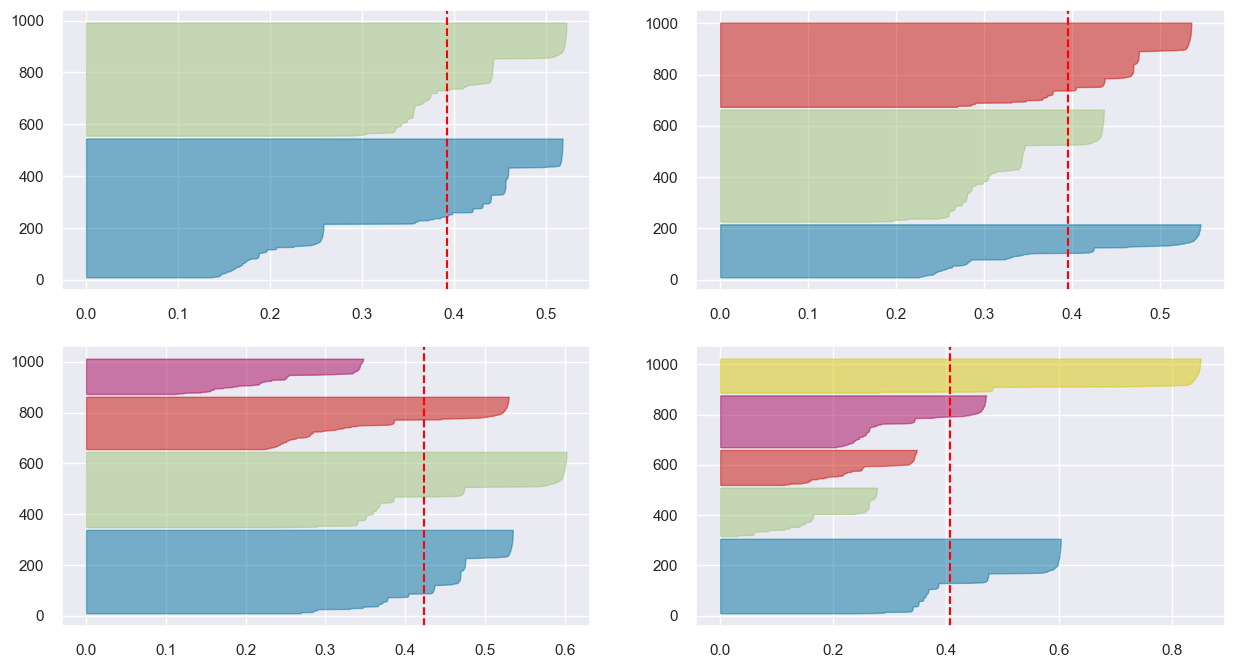

In [60]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

Se muestran 4 gráficas diferentes donde se va desde 2 clusters hasta 5 y se ve el valor del silhouette promedio (linea discontinua roja) por cada grupo de clusters diferente. Se puede ver que en el grupo de 4 clusters es donde se obtiene un coeficiente mayor que en los demás, siendo la gráfica con 5 clusters el más cercano.

In [15]:
df_clusterd = df.copy()
df_clusterd['cluster'] = km.labels_
df_clusterd.sample(5)

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,...,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO,kmean,cluster
796,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0.097231,1.500000e+10,1,1
134,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.018213,3.780120e+07,0,3
453,2,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,-0.065793,-1.191346e+09,0,3
694,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.072378,2.066900e+08,0,3
43,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0.099738,4.806789e+07,0,3


In [16]:
from pathlib import Path

try:
    filepath = Path('data/clustered_data_kmeans.csv')
    df_clusterd.to_csv(filepath, index=False)
    print("Archivo guardado exitosamente")
except:
    print("Error al guardar el archivo")

Archivo guardado exitosamente
